In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

We will be solving the 2D advection equation using interpolating SL methods under periodic boundary conditions. 

In [5]:
# Parameters
N = 101 # Number of grid points in each direction
v_x, v_y = 1, 1 # Velocity in x and y directions
dt = 1 # Time step size
T = 1000 # Number of timesteps

In [4]:
# grid to store states for each timestep
grid = np.zeros((T, N, N))

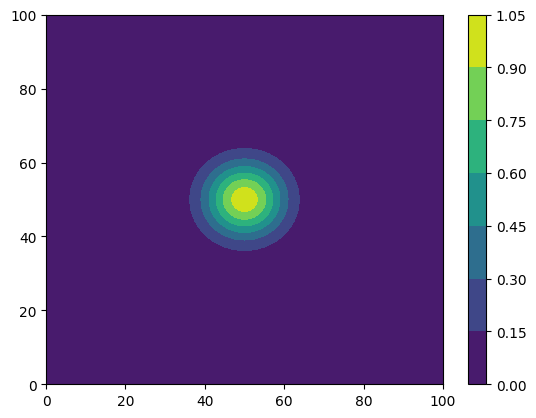

In [12]:
# initial condtions
x = np.linspace(-(N-1)//2, (N-1)//2, N)
y = np.linspace(-(N-1)//2, (N-1)//2, N)
x_grid, y_grid = np.meshgrid(x, y)

grid[0, :, :] = np.exp(-((x_grid/10)**2 + (y_grid/10)**2))
#grid[1, :, :] = np.exp((-((x-v_x*dt)/10)**2 - ((y-v_y*dt)/10)**2))

cp = plt.contourf(grid[0, :, :])
plt.colorbar(cp)
plt.show()


In [ ]:
# Starting point problem solver, gives us the value of x backtracing for dt timesteps, aka alpha
def starting_point(v, dt):
    return float(v*dt)

# Interpolator, takes in x and u at nearest gridpoints and returns u at x
def interp(x, floor_u, ceil_u):
    ceil_x = math.ceil(x)
    return (floor_u*(ceil_x - x) + ceil_u*(1 + x - ceil_x))

# Semi-Lagrangian interpolation, gives us the value of x at the starting point for the next timestep
def semi_lagrange_interp(timestep, grid_array, alpha):
    grid_array[timestep + 1, :] = [interp(x - 2*alpha, grid_array[timestep - 1, math.floor(x - 2*alpha)], grid_array[timestep - 1, math.ceil(x - 2*alpha)]) for x in range(len(grid_array[0]))]

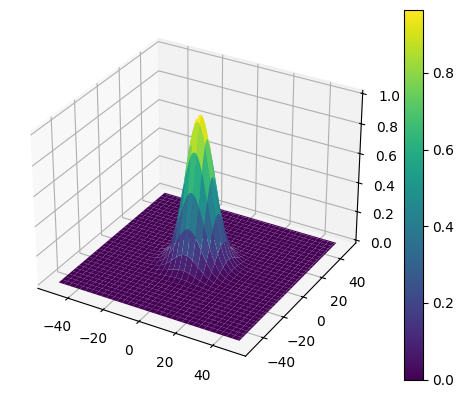

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(-(N-1)//2, (N-1)//2, N)
y = np.linspace(-(N-1)//2, (N-1)//2, N)
x_grid, y_grid = np.meshgrid(x, y)
z = grid[0, :, :]  # The initial condition values as heights

# Plotting the surface
surf = ax.plot_surface(x_grid, y_grid, z, cmap='viridis')
plt.colorbar(surf)
plt.show()